In [1]:
import sys
!{sys.executable} -m pip install numpy pandas seaborn matplotlib scikit-learn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.8 MB 1.9 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.8 MB 2.1 MB/s eta 0:00:06
   ----- ---------------------------------- 1.8/12.8 MB 2.2 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.8 MB 2.3 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/12.8 MB 2.5 MB/s eta 0:00:04
   ----------- ---------------------------- 3.7/12.8 MB 2.5 MB/s eta 0:00:04
   ---


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\ralma\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [54]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split

import os

print(os.listdir("../data"))  # lists files in the current folder


['age_gender_bkts.csv', 'countries.csv', 'sample_submission_NDF.csv', 'sessions.csv', 'test_users.csv', 'train_users_2.csv']


In [55]:
#  data from csv files is imported to  pandas data frames
data_train_org = pd.read_csv("../data/train_users_2.csv")
print(data_train_org.columns)
data_train_org=data_train_org.sort_values(by='timestamp_first_active')

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [56]:
print(data_train_org.shape)

(213451, 16)


In [57]:
data_train, data_test = train_test_split(data_train_org, test_size=0.2)
data_train_copy = data_train
print("%d items in training data, %d in test data" % (len(data_train), len(data_test)))

170760 items in training data, 42691 in test data


In [58]:
# Removing the date_first_booking column from data_train and data_test
print(data_train.columns)

data_train = data_train.drop('date_first_booking', axis=1)
data_test  = data_test.drop('date_first_booking', axis=1)

data_train = data_train.sort_values(by='timestamp_first_active')
data_test  = data_test.sort_values(by='timestamp_first_active')


Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [59]:
#replacing gender and age values which are not present to Nan
data_train.loc[:, "gender"] = data_train["gender"].replace("-unknown-", np.nan)
data_test.loc[:, "gender"]  = data_test["gender"].replace("-unknown-", np.nan)

data_train.loc[:, "age"] = data_train["age"].replace("NaN", np.nan)
data_test.loc[:, "age"]  = data_test["age"].replace("NaN", np.nan)
print(data_train.head())

           id date_account_created  timestamp_first_active  gender   age  \
0  gxn3p5htnn           2010-06-28          20090319043255     NaN   NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247  FEMALE  56.0   
5  osr2jwljor           2010-01-01          20100101215619     NaN   NaN   
6  lsw9q7uk0j           2010-01-02          20100102012558  FEMALE  46.0   
7  0d01nltbrs           2010-01-03          20100103191905  FEMALE  47.0   

  signup_method  signup_flow language affiliate_channel affiliate_provider  \
0      facebook            0       en            direct             direct   
2         basic            3       en            direct             direct   
5         basic            0       en             other              other   
6         basic            0       en             other         craigslist   
7         basic            0       en            direct             direct   

  first_affiliate_tracked signup_app first_device_type first_browser  \
0 

<Axes: >

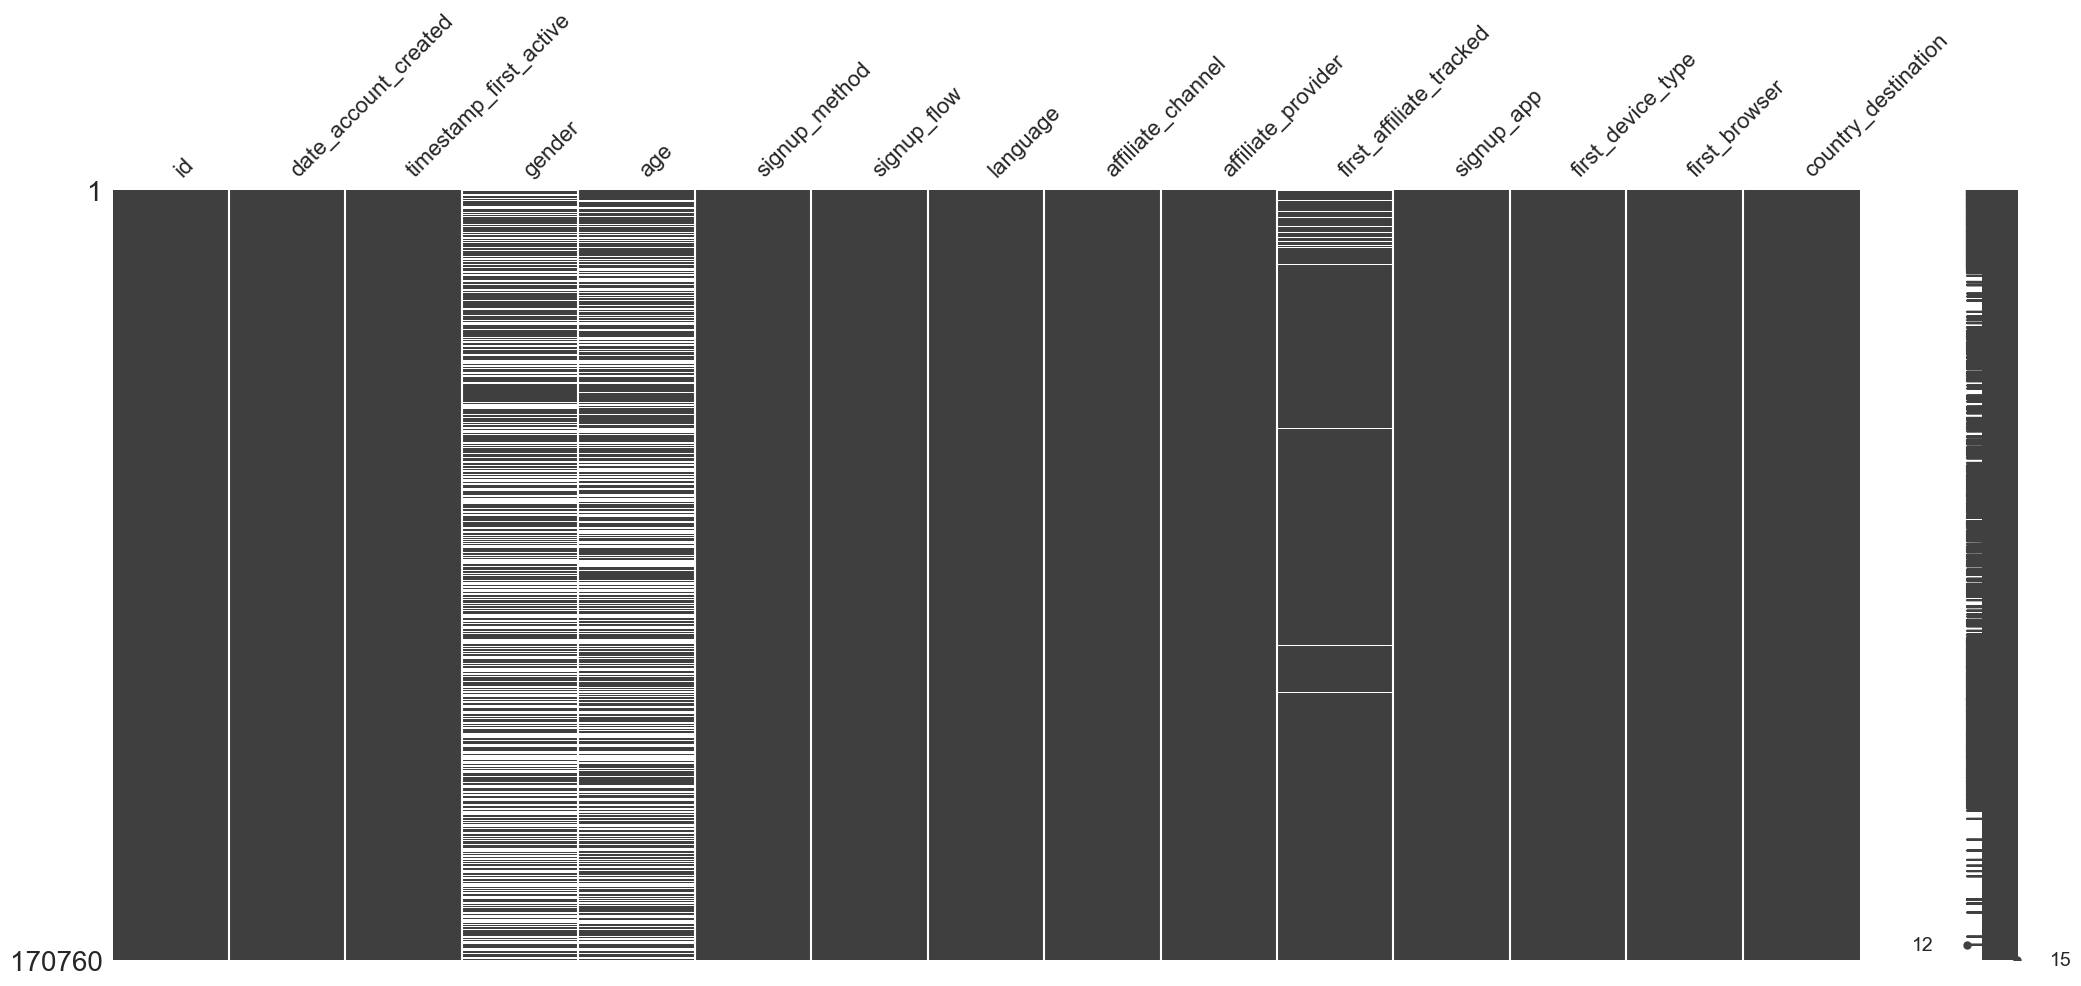

In [60]:
import missingno as msno
msno.matrix(data_train)

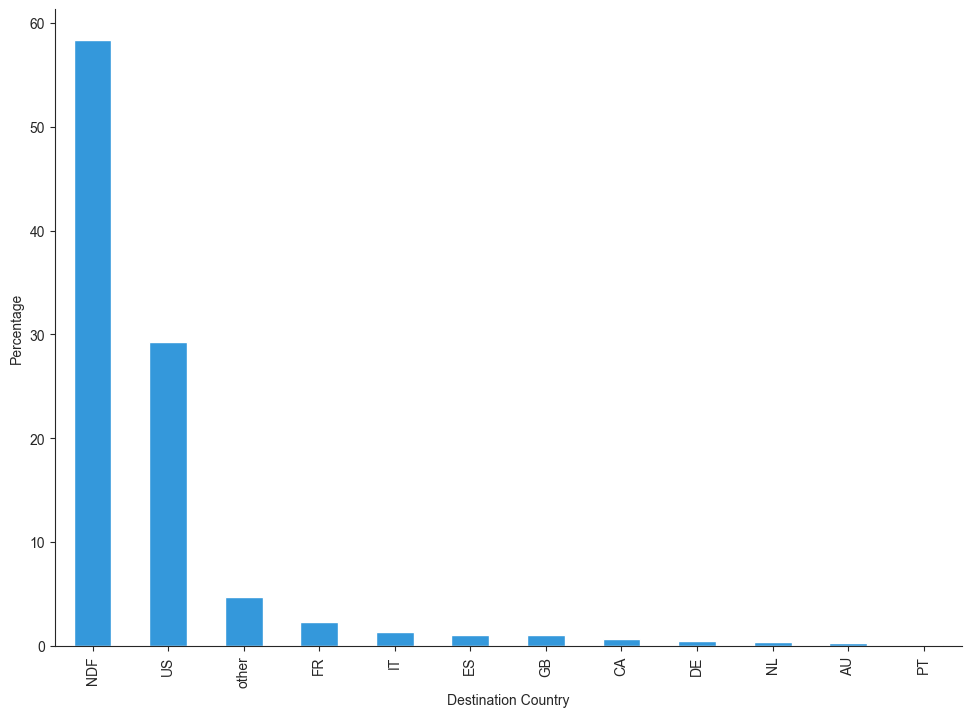

In [61]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = data_train.country_destination.value_counts() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

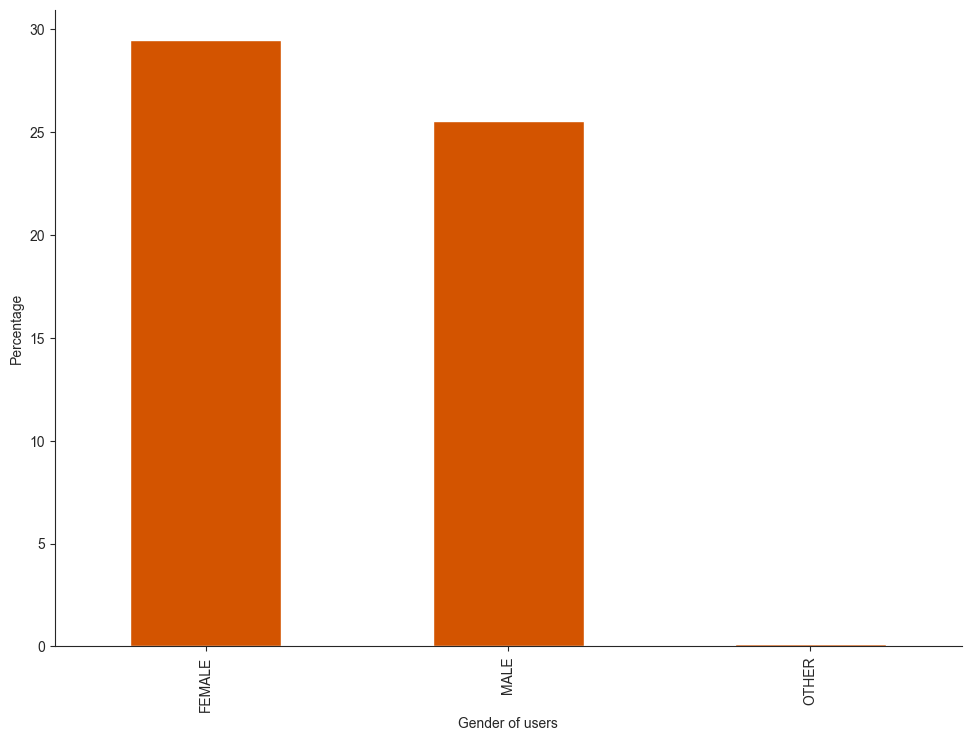

In [62]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
gender_percentage = data_train.gender.value_counts() / data_train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#D35400')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

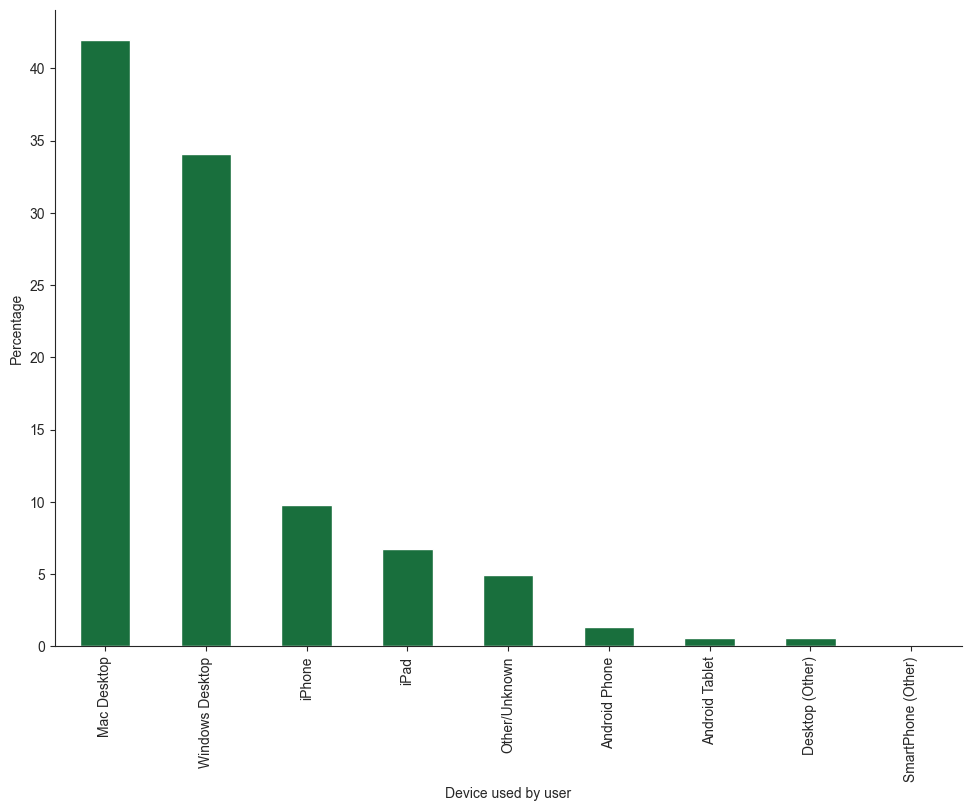

In [63]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = data_train.first_device_type.value_counts() / data_train.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

C:\Users\ralma\AppData\Local\Temp\ipykernel_25460\2101552303.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train.age.dropna(), color='#16A085')


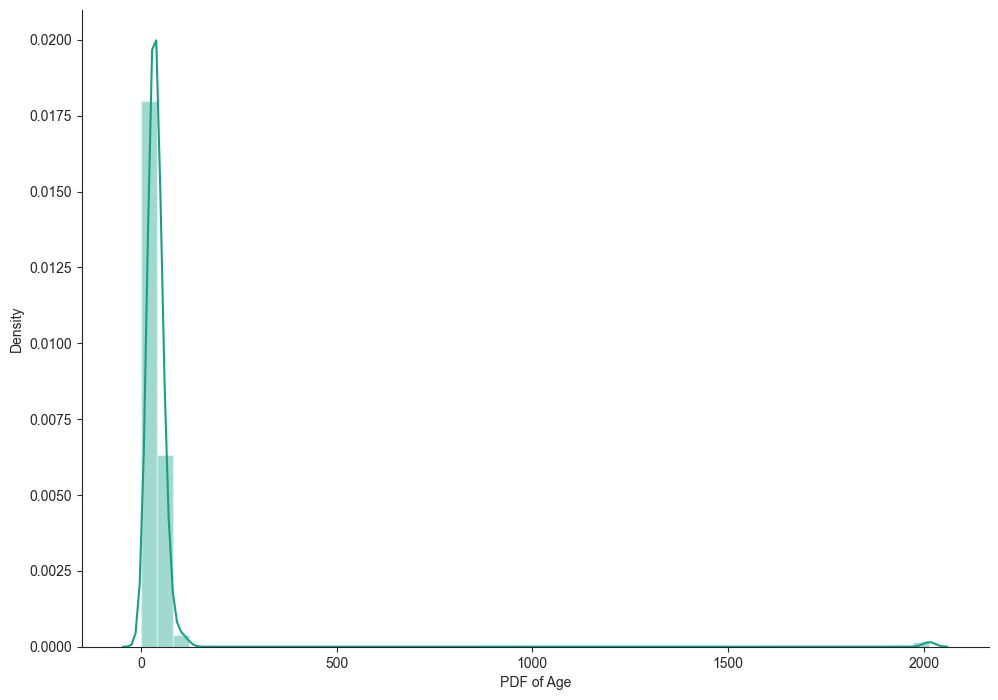

In [64]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(data_train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()


# new version : 


# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)

# sns.histplot(
#     data_train.age.dropna(),
#     bins=30,        # adjust for smoothness
#     kde=True,       # adds the density curve
#     stat="density", # match PDF style of distplot
#     color='#16A085',
#     ax=ax
# )

# plt.xlabel('PDF of Age')
# sns.despine()


C:\Users\ralma\AppData\Local\Temp\ipykernel_25460\2459019270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train.age.dropna(), color='#16A085')


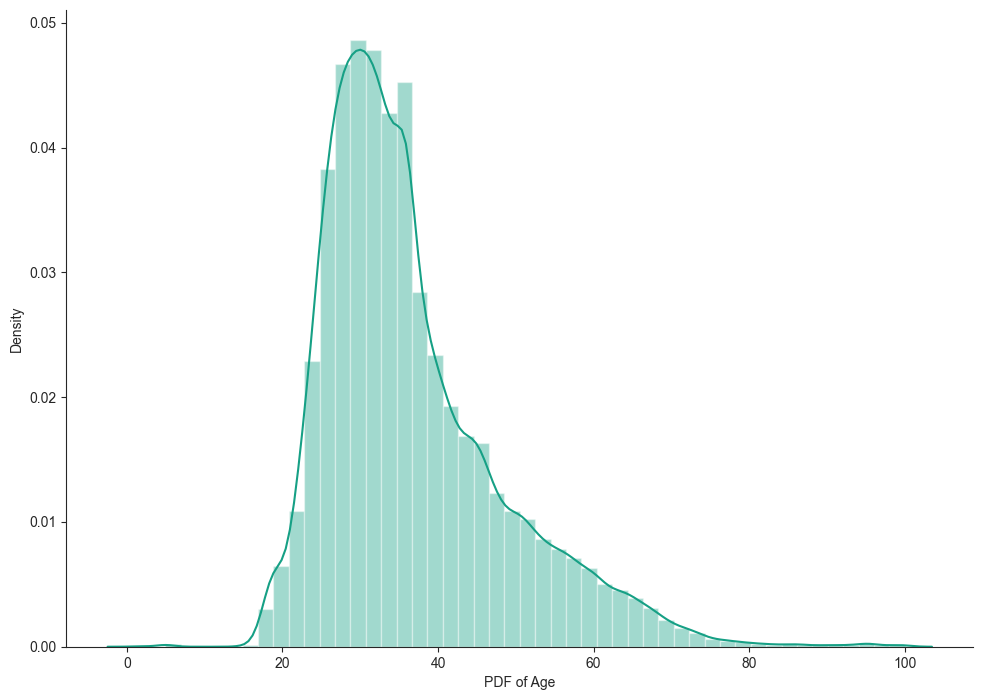

In [65]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_train['age']=data_train['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(data_train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

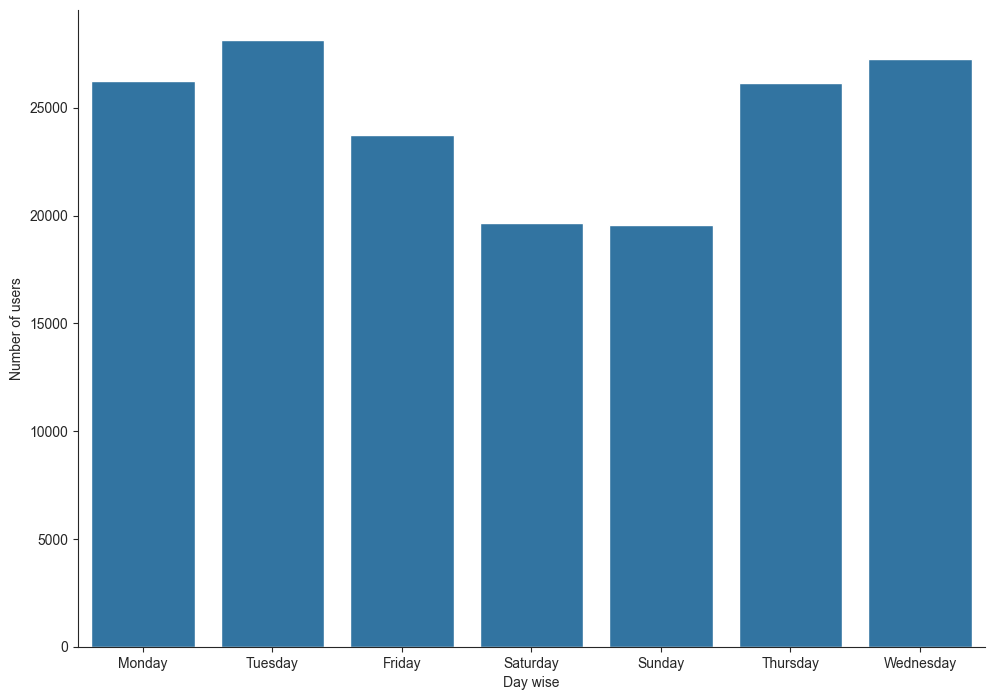

In [66]:
data_train['date_account_created_new'] = pd.to_datetime(data_train['date_account_created'])
data_train['date_first_active_new'] = pd.to_datetime((data_train.timestamp_first_active // 1000000), format='%Y%m%d')

data_train['date_account_created_day']   = data_train.date_account_created_new.dt.day_name()
data_train['date_account_created_month'] = data_train.date_account_created_new.dt.month
data_train['date_account_created_year']  = data_train.date_account_created_new.dt.year

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data_without_NDF  = data_train[data_train['country_destination']!='US']
data_without_NDF1 = data_without_NDF[data_without_NDF['country_destination']!='NDF']

sns.countplot(x='date_account_created_day', data=data_train)
plt.xlabel('Day wise')
plt.ylabel('Number of users')
sns.despine()


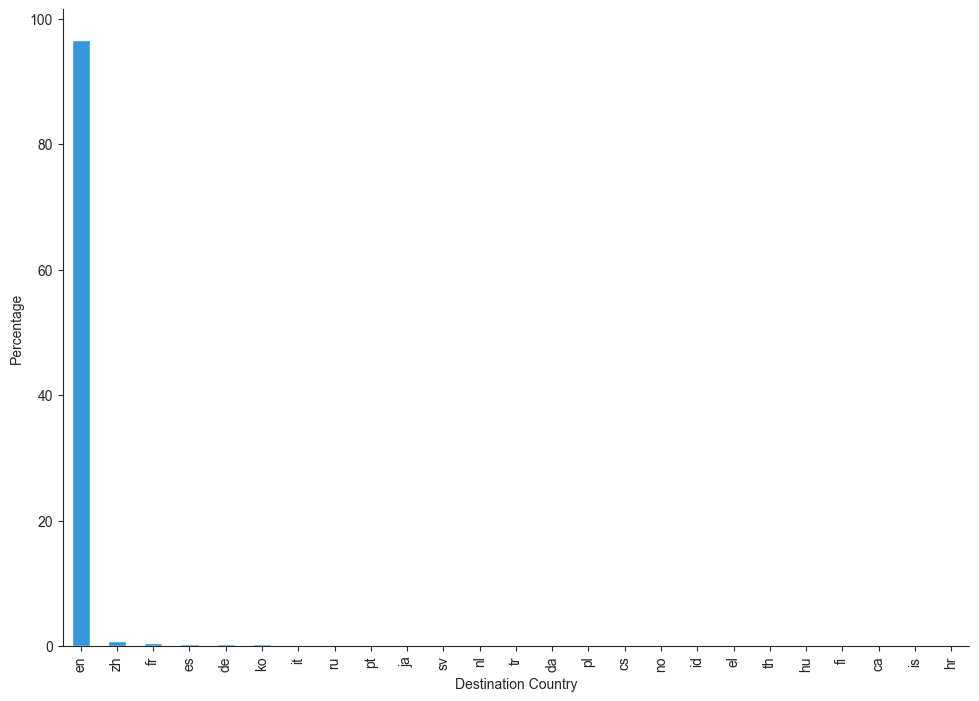

In [67]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = data_train.language.value_counts() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

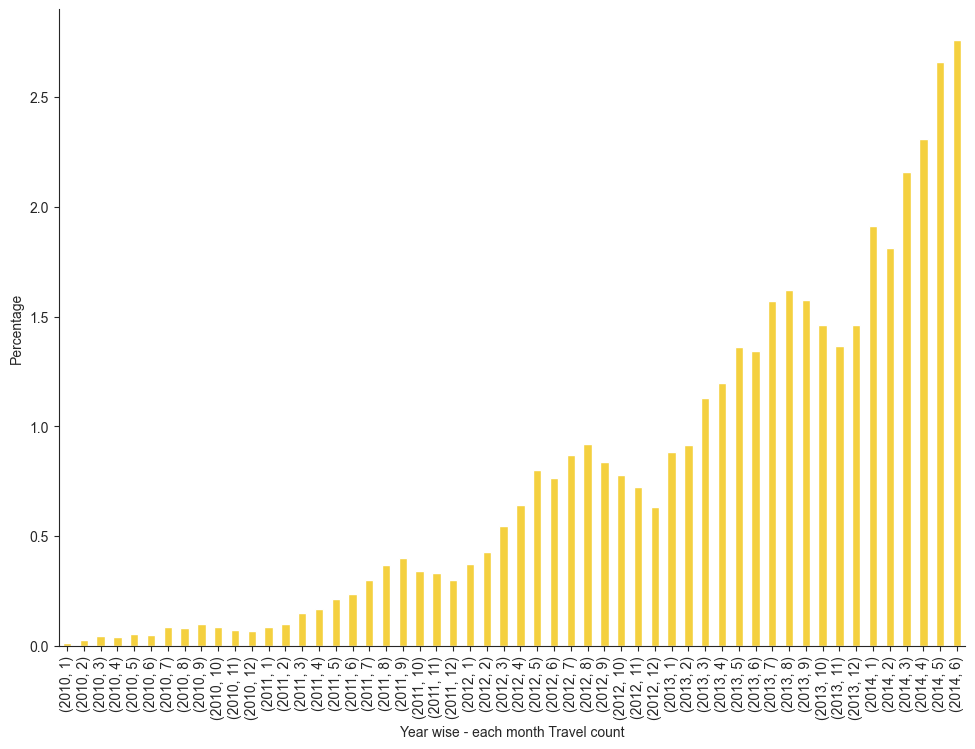

In [68]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
data_train['booked'] = data_train.country_destination.apply(lambda x:1 if x!='NDF' else 0 )
destination_percentage = data_train.groupby(['date_account_created_year','date_account_created_month']).booked.sum() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color="#F4D03F")
plt.xlabel('Year wise - each month Travel count')
plt.ylabel('Percentage')
sns.despine()

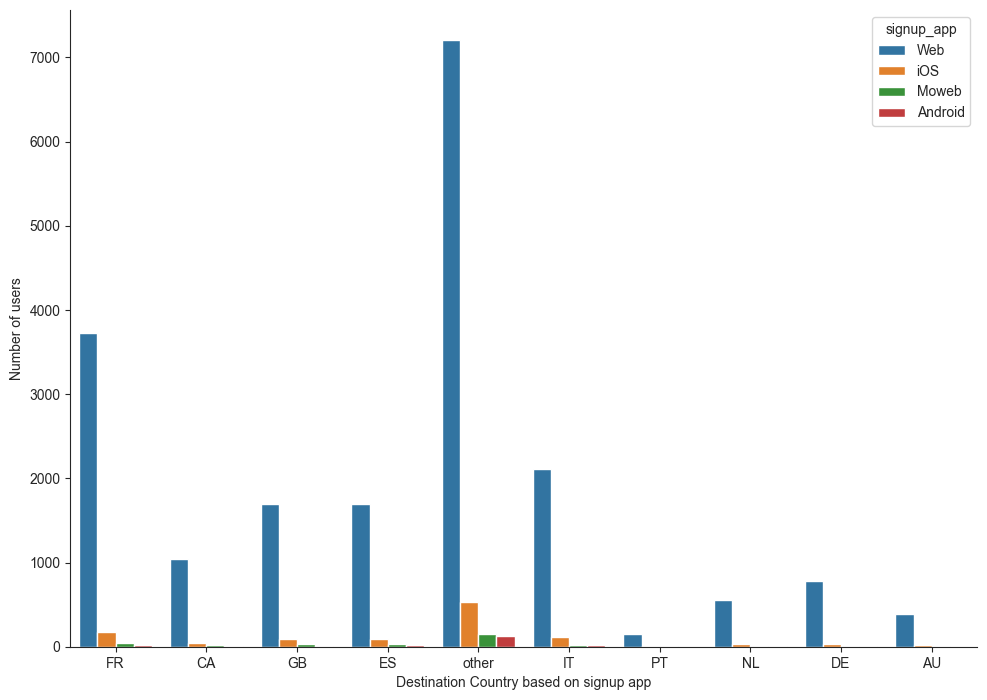

In [69]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

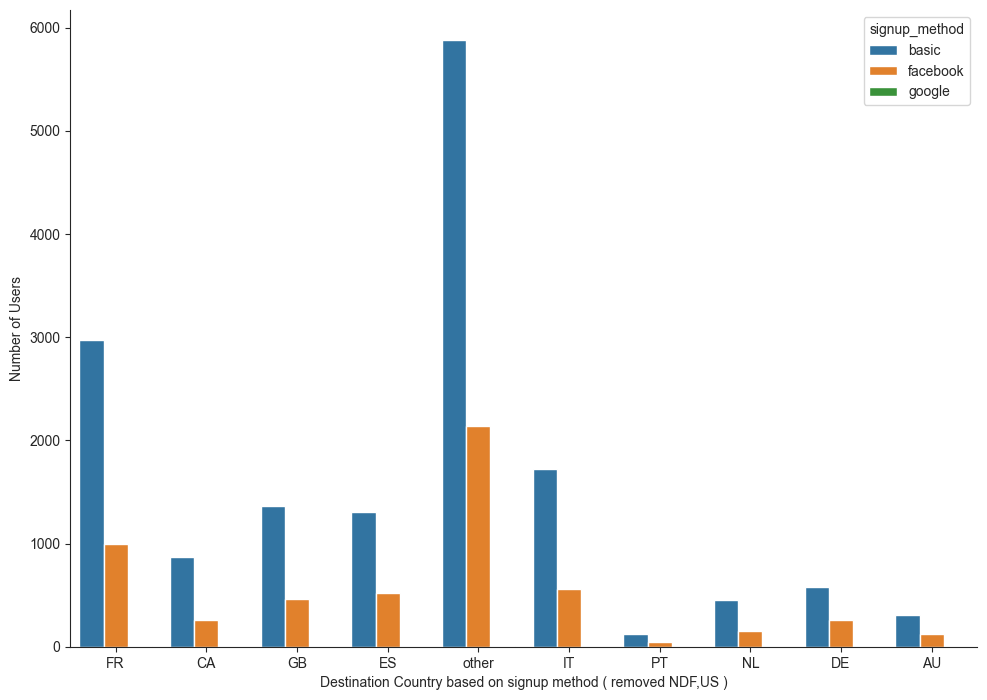

In [70]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method ( removed NDF,US )')
plt.ylabel('Number of Users')
sns.despine()

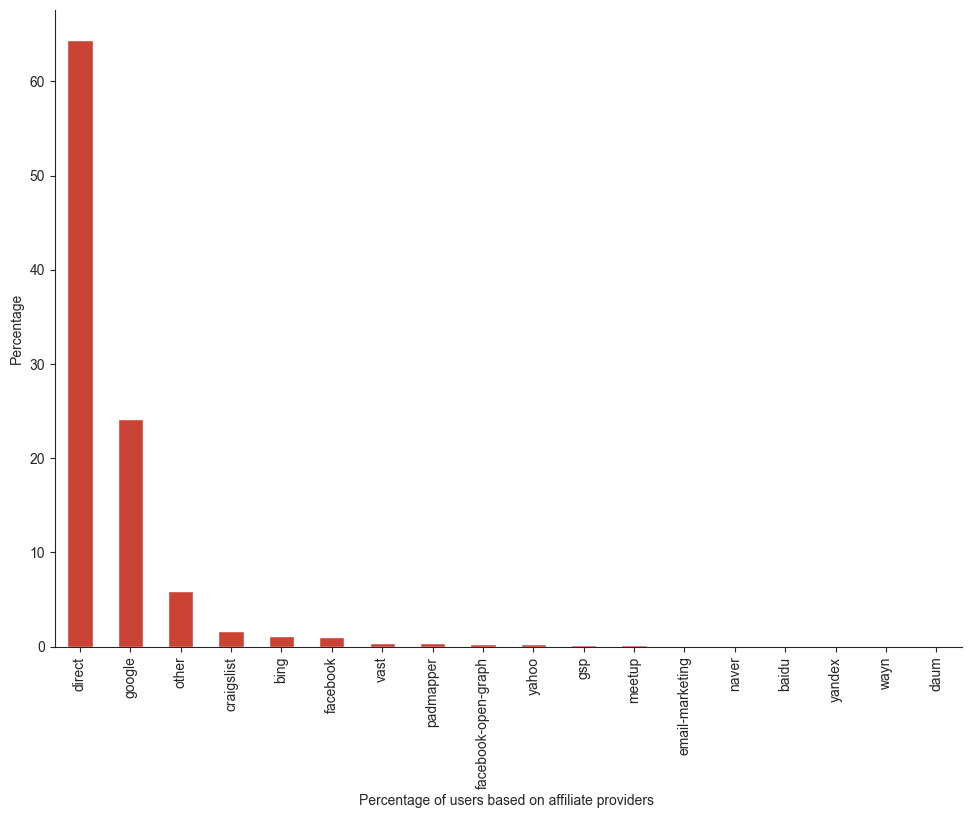

In [71]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = data_train.affiliate_provider.value_counts() / data_train.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color='#CB4335')
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
sns.despine()

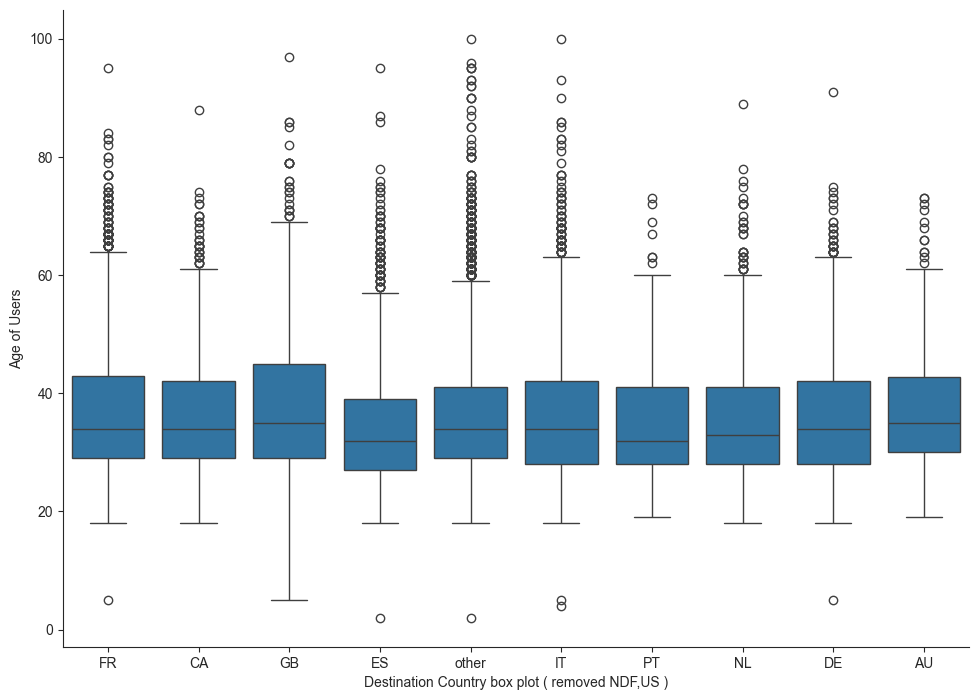

In [72]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=data_without_NDF1)
plt.xlabel('Destination Country box plot ( removed NDF,US )')
plt.ylabel('Age of Users')
sns.despine()

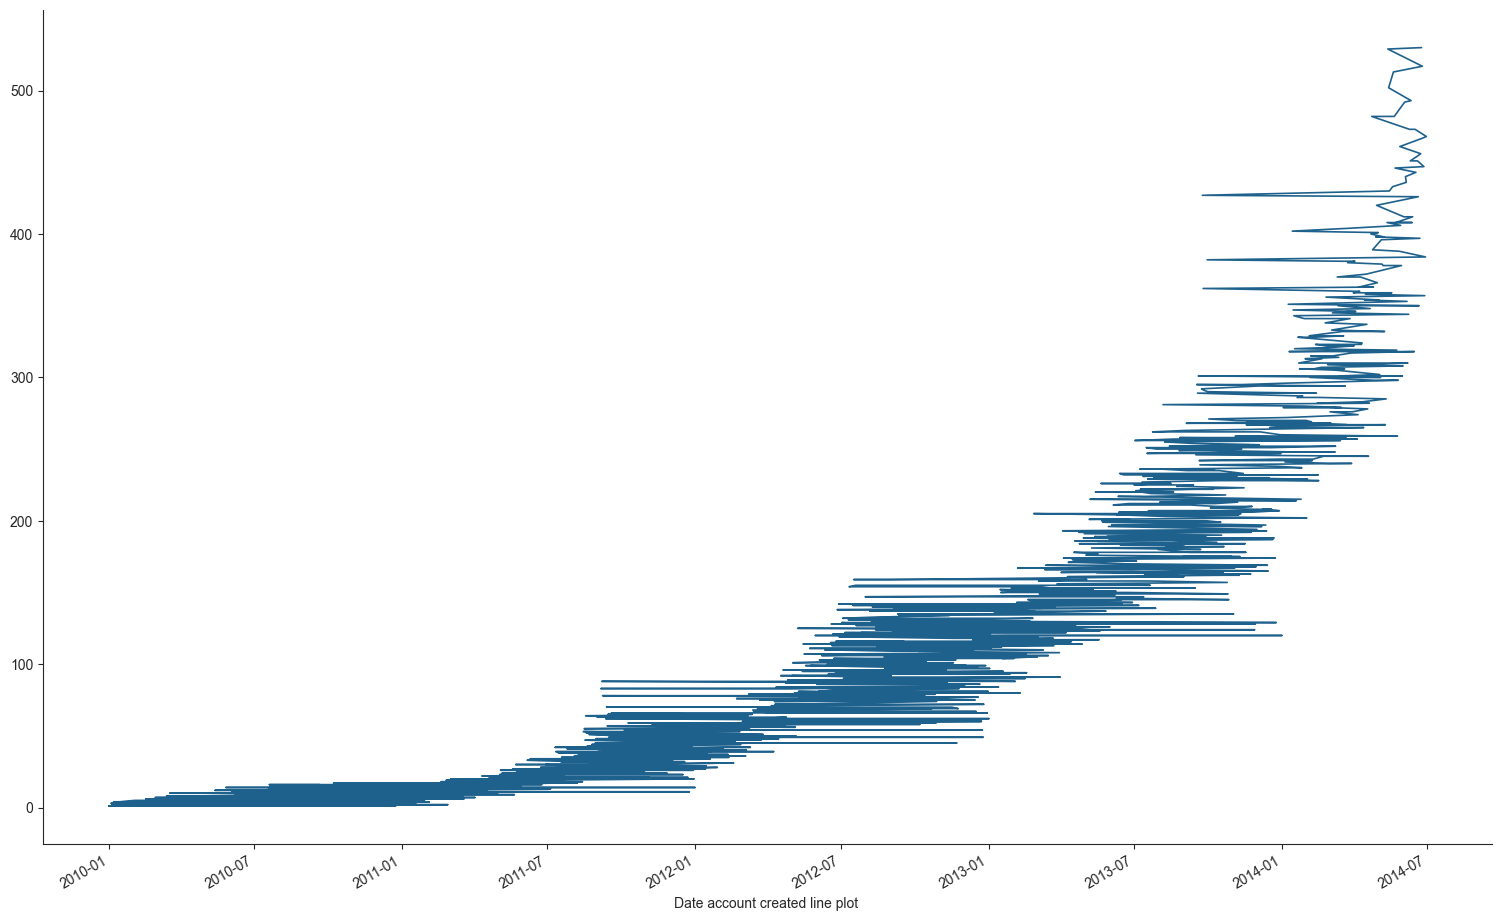

In [73]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 12.27)
data_train.date_account_created_new.value_counts().plot(kind='line', linewidth=1.2, color='#1F618D')
plt.xlabel('Date account created line plot ')
sns.despine()

In [74]:
from sklearn.preprocessing import LabelEncoder
df_all = data_train_copy
print(df_all.columns)
df_all = df_all.drop(['id', 'date_first_booking'], axis=1)
df_all = df_all.fillna(-1)
dac = np.vstack(df_all.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df_all['dac_year'] = dac[:,0]
df_all['dac_month'] = dac[:,1]
df_all['dac_day'] = dac[:,2]
df_all = df_all.drop(['date_account_created'], axis=1)
tfa = np.vstack(df_all.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df_all['tfa_year'] = tfa[:,0]
df_all['tfa_month'] = tfa[:,1]
df_all['tfa_day'] = tfa[:,2]
df_all = df_all.drop(['timestamp_first_active'], axis=1)
av = df_all.age.values
df_all['age'] = np.where(np.logical_or(av<14, av>100), -1, av)
ohe_feats = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [75]:
df_all  = data_train_copy
piv_train = data_train.shape[0]
df_all = df_all.drop(['id', 'date_first_booking'], axis=1)
df_all = df_all.fillna(-1)
dac = np.vstack(df_all.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df_all['dac_year'] = dac[:,0]
df_all['dac_month'] = dac[:,1]
df_all['dac_day'] = dac[:,2]
df_all = df_all.drop(['date_account_created'], axis=1)

tfa = np.vstack(df_all.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df_all['tfa_year'] = tfa[:,0]
df_all['tfa_month'] = tfa[:,1]
df_all['tfa_day'] = tfa[:,2]
df_all = df_all.drop(['timestamp_first_active'], axis=1)
av = df_all.age.values
df_all['age'] = np.where(np.logical_or(av<14, av>100), -1, av)

In [76]:
for f in ohe_feats:
    df_all_dummy = pd.get_dummies(df_all[f], prefix=f)
    df_all = df_all.drop([f], axis=1)
    df_all = pd.concat((df_all, df_all_dummy), axis=1)
vals = df_all.values
piv_train = df_all.shape[0]
X = vals[:piv_train]
le = LabelEncoder()
labels = df_all['country_destination'].values
df_all = df_all.drop(['country_destination'], axis=1)
y = le.fit_transform(labels)   
X_test = vals[piv_train:]
df_all

age  dac_year  dac_month  dac_day  tfa_year  tfa_month  tfa_day  \
27511   -1.0      2012          6       12      2012          6       12   
73025   42.0      2013          4       25      2013          4       25   
130340  -1.0      2013         12        6      2013         12        6   
13263   28.0      2011         11       30      2011         11       30   
84686   22.0      2013          6       18      2013          6       18   
...      ...       ...        ...      ...       ...        ...      ...   
76519   -1.0      2013          5       12      2013          5       12   
74286   -1.0      2013          5        1      2013          5        1   
32020   -1.0      2012          7       15      2012          7       15   
186964  26.0      2014          5       10      2014          5       10   
36299   40.0      2012          8       13      2012          8       13   

        gender_-unknown-  gender_FEMALE  gender_MALE  ...  \
27511               True          False        False  ...   
73025              False           True        False  ...   
130340              True          False        False  ...   
13263              False          False         True  ...   
84686               True          False        False  ...   
...                  ...            ...          ...  ...   
76519               True          False        False  ...   
74286               True          False        False  ...   
32020               True          False        False  ...   
186964             False           True        False  ...   
36299              False           True        False  ...   

        first_browser_SeaMonkey  first_browser_Silk  first_browser_SiteKiosk  \
27511                     False               False                    False   
73025                     False               False                    False   
130340                    False               False                    False   
13263                     False               False                    False   
84686                     False               False                    False   
...                         ...                 ...                      ...   
76519                     False               False                    False   
74286                     False               False                    False   
32020                     False               False                    False   
186964                    False               False                    False   
36299                     False               False                    False   

        first_browser_SlimBrowser  first_browser_Sogou Explorer  \
27511                       False                         False   
73025                       False                         False   
130340                      False                         False   
13263                       False                         False   
84686                       False                         False   
...                           ...                           ...   
76519                       False                         False   
74286                       False                         False   
32020                       False                         False   
186964                      False                         False   
36299                       False                         False   

        first_browser_Stainless  first_browser_TenFourFox  \
27511                     False                     False   
73025                     False                     False   
130340                    False                     False   
13263                     False                     False   
84686                     False                     False   
...                         ...                       ...   
76519                     False                     False   
74286                     False                     False   
32020                     False                 

In [77]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

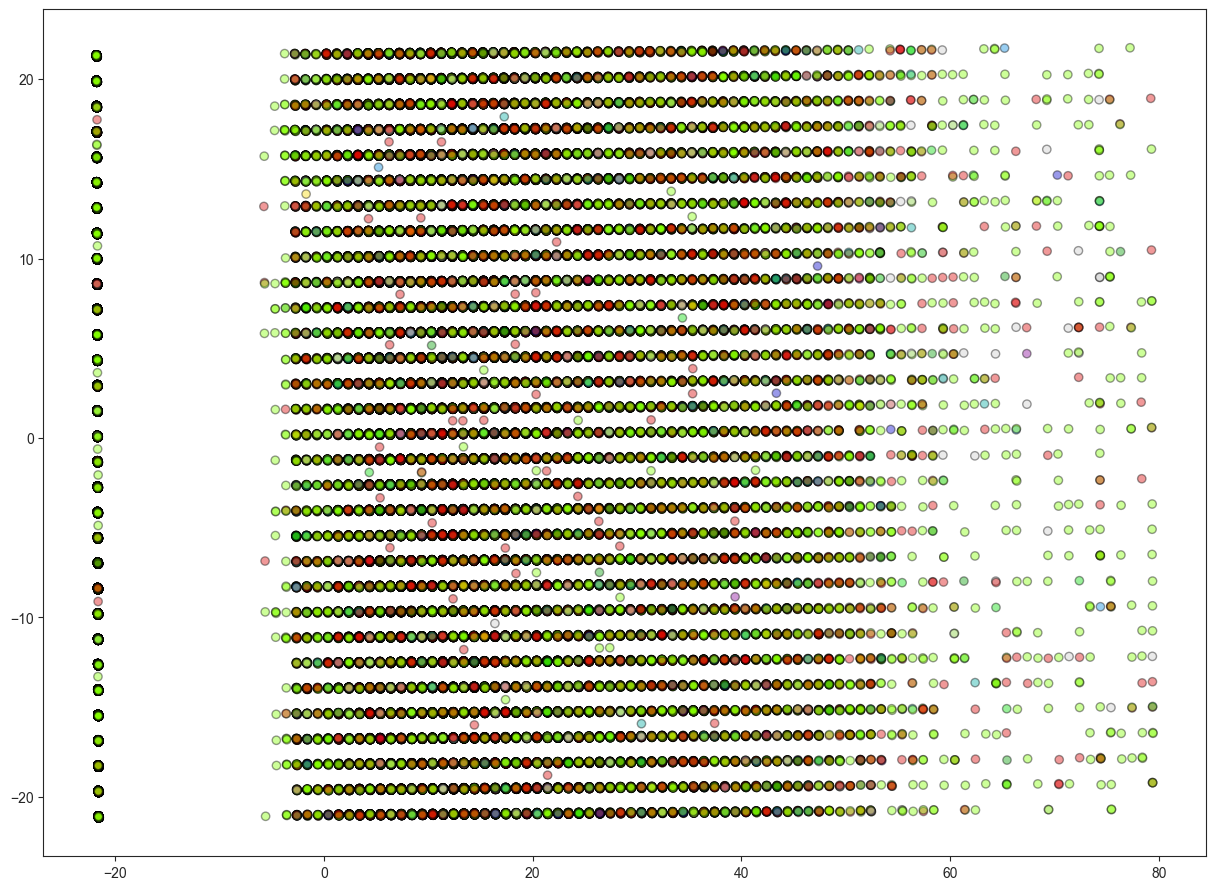

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (15, 11)

X_pca = PCA().fit_transform(df_all)

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap=plt.cm.nipy_spectral,
    alpha=0.4,
    edgecolor='k'
)

plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 170760 samples in 0.132s...
[t-SNE] Computed neighbors for 170760 samples in 133.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 170760
[t-SNE] Computed conditional probabilities for sample 2000 / 170760
[t-SNE] Computed conditional probabilities for sample 3000 / 170760
[t-SNE] Computed conditional probabilities for sample 4000 / 170760
[t-SNE] Computed conditional probabilities for sample 5000 / 170760
[t-SNE] Computed conditional probabilities for sample 6000 / 170760
[t-SNE] Computed conditional probabilities for sample 7000 / 170760
[t-SNE] Computed conditional probabilities for sample 8000 / 170760
[t-SNE] Computed conditional probabilities for sample 9000 / 170760
[t-SNE] Computed conditional probabilities for sample 10000 / 170760
[t-SNE] Computed conditional probabilities for sample 11000 / 170760
[t-SNE] Computed conditional probabilities for sample 12000 / 170760
[t-SNE] Computed conditional proba

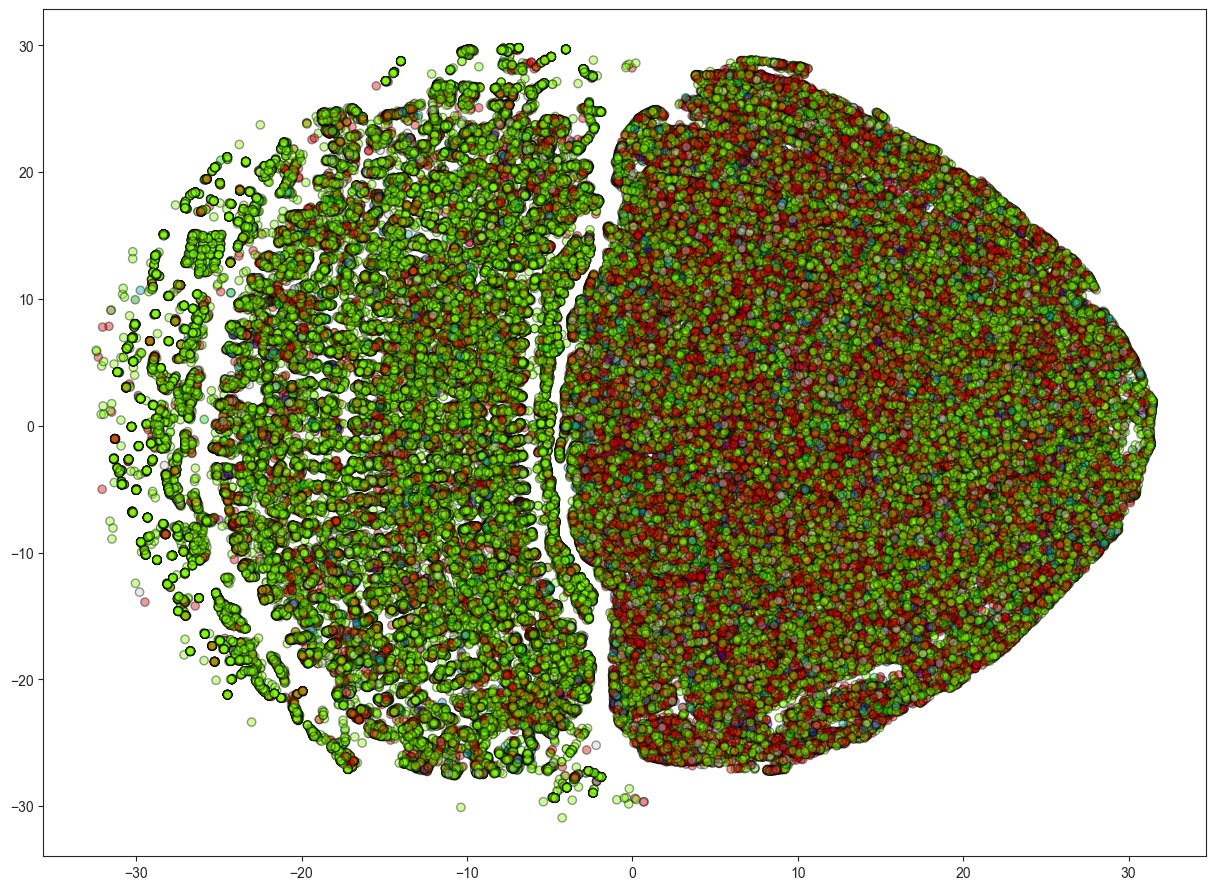

In [79]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 11)

X_tsne = TSNE(
    learning_rate=100,
    verbose=2,
    random_state=42
).fit_transform(df_all)

plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    cmap=plt.cm.nipy_spectral,
    alpha=0.4,
    edgecolor='k'
)
plt.show()
